In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
Dataset = pd.read_csv(r"C:\Users\niraj\OneDrive\Desktop\Netflix User Analysis\Netflix Userbase.csv")
Dataset.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [7]:
Dataset.tail()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [9]:
Dataset.shape

(2500, 10)

In [8]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [12]:

#User_id is unnecesssary
Dataset.drop("User ID",axis =1,inplace = True)


In [13]:
Dataset.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [14]:
#Check for null values
Dataset.isnull().sum()

Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [21]:
duplicate = Dataset[Dataset.duplicated()]
if duplicate.empty:
    print("Duplicates doesnot exist")
else:
    print("Duplicates exist")

Duplicates doesnot exist


In [23]:
#changing Join date and Last paymentt date to datetime type
Dataset["Join Date"] = pd.to_datetime(Dataset["Join Date"])
Dataset["Last Payment Date"] = pd.to_datetime(Dataset["Last Payment Date"])

In [28]:
#creating new columns that will extract year and month of Join date and Last Payment Date for better visualization

Dataset["Join year"] = Dataset["Join Date"].dt.year
Dataset["Join month"] = Dataset["Join Date"].dt.month
Dataset["Last Payment year"] = Dataset["Last Payment Date"].dt.year
Dataset["Last Payment month"] = Dataset["Last Payment Date"].dt.month
Dataset["Account Since"] = (pd.to_datetime("today") - Dataset["Join Date"]).dt.days


In [29]:
Dataset.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join year,Join month,Last Payment year,Last Payment month,Account Since
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,2022,1,2023,10,580
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,2021,5,2023,6,831
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023,2,2023,6,171
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,2022,10,2023,6,315
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023,1,2023,6,225


In [30]:
#Convert Plan Duration into number
for i in range(len(Dataset)):
    Dataset["Plan Duration"] = Dataset["Plan Duration"][i][0]
    
Dataset.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join year,Join month,Last Payment year,Last Payment month,Account Since
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1,2022,1,2023,10,580
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1,2021,5,2023,6,831
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1,2023,2,2023,6,171
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1,2022,10,2023,6,315
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1,2023,1,2023,6,225


In [34]:
#Adding new columns with dummy values by feature encoding

Subscription_type_en = pd.get_dummies(Dataset["Subscription Type"],prefix = "subscription type")
Dataset = pd.concat([Dataset,Subscription_type_en],axis = 1)

Country_en = pd.get_dummies(Dataset["Country"],prefix = "Country_type")
Dataset = pd.concat([Dataset,Country_en],axis = 1)

Device_en = pd.get_dummies(Dataset["Device"],prefix = "Device_type")
Dataset = pd.concat([Dataset,Device_en],axis = 1)


Gender_en = pd.get_dummies(Dataset["Device"],prefix = "Gender_type")
Dataset = pd.concat([Dataset,Device_en],axis = 1)

Dataset["Age_bins"] = pd.cut(Dataset["Age"],
              bins = [0,18,28,38,48,58,100],
            labels = [">18","18-27","28-37","38-47","48-57","58+"])


Dataset.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join year,...,Country_type_United States,Device_type_Laptop,Device_type_Smart TV,Device_type_Smartphone,Device_type_Tablet,Device_type_Laptop,Device_type_Smart TV,Device_type_Smartphone,Device_type_Tablet,Age_bins
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1,2022,...,1,0,0,1,0,0,0,1,0,18-27
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1,2021,...,0,0,0,0,1,0,0,0,1,28-37
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1,2023,...,0,0,1,0,0,0,1,0,0,38-47
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1,2022,...,0,1,0,0,0,1,0,0,0,48-57
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1,2023,...,0,0,0,1,0,0,0,1,0,28-37


In [35]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Subscription Type            2500 non-null   object        
 1   Monthly Revenue              2500 non-null   int64         
 2   Join Date                    2500 non-null   datetime64[ns]
 3   Last Payment Date            2500 non-null   datetime64[ns]
 4   Country                      2500 non-null   object        
 5   Age                          2500 non-null   int64         
 6   Gender                       2500 non-null   object        
 7   Device                       2500 non-null   object        
 8   Plan Duration                2500 non-null   object        
 9   Join year                    2500 non-null   int64         
 10  Join month                   2500 non-null   int64         
 11  Last Payment year            2500 non-null 

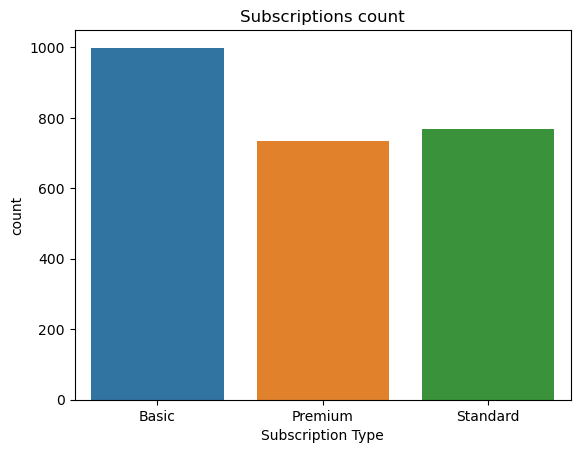

In [37]:
#Visualisations

sns.countplot(x = "Subscription Type",data = Dataset)
plt.title("Subscriptions count")
plt.show()

<AxesSubplot:xlabel='Country', ylabel='count'>

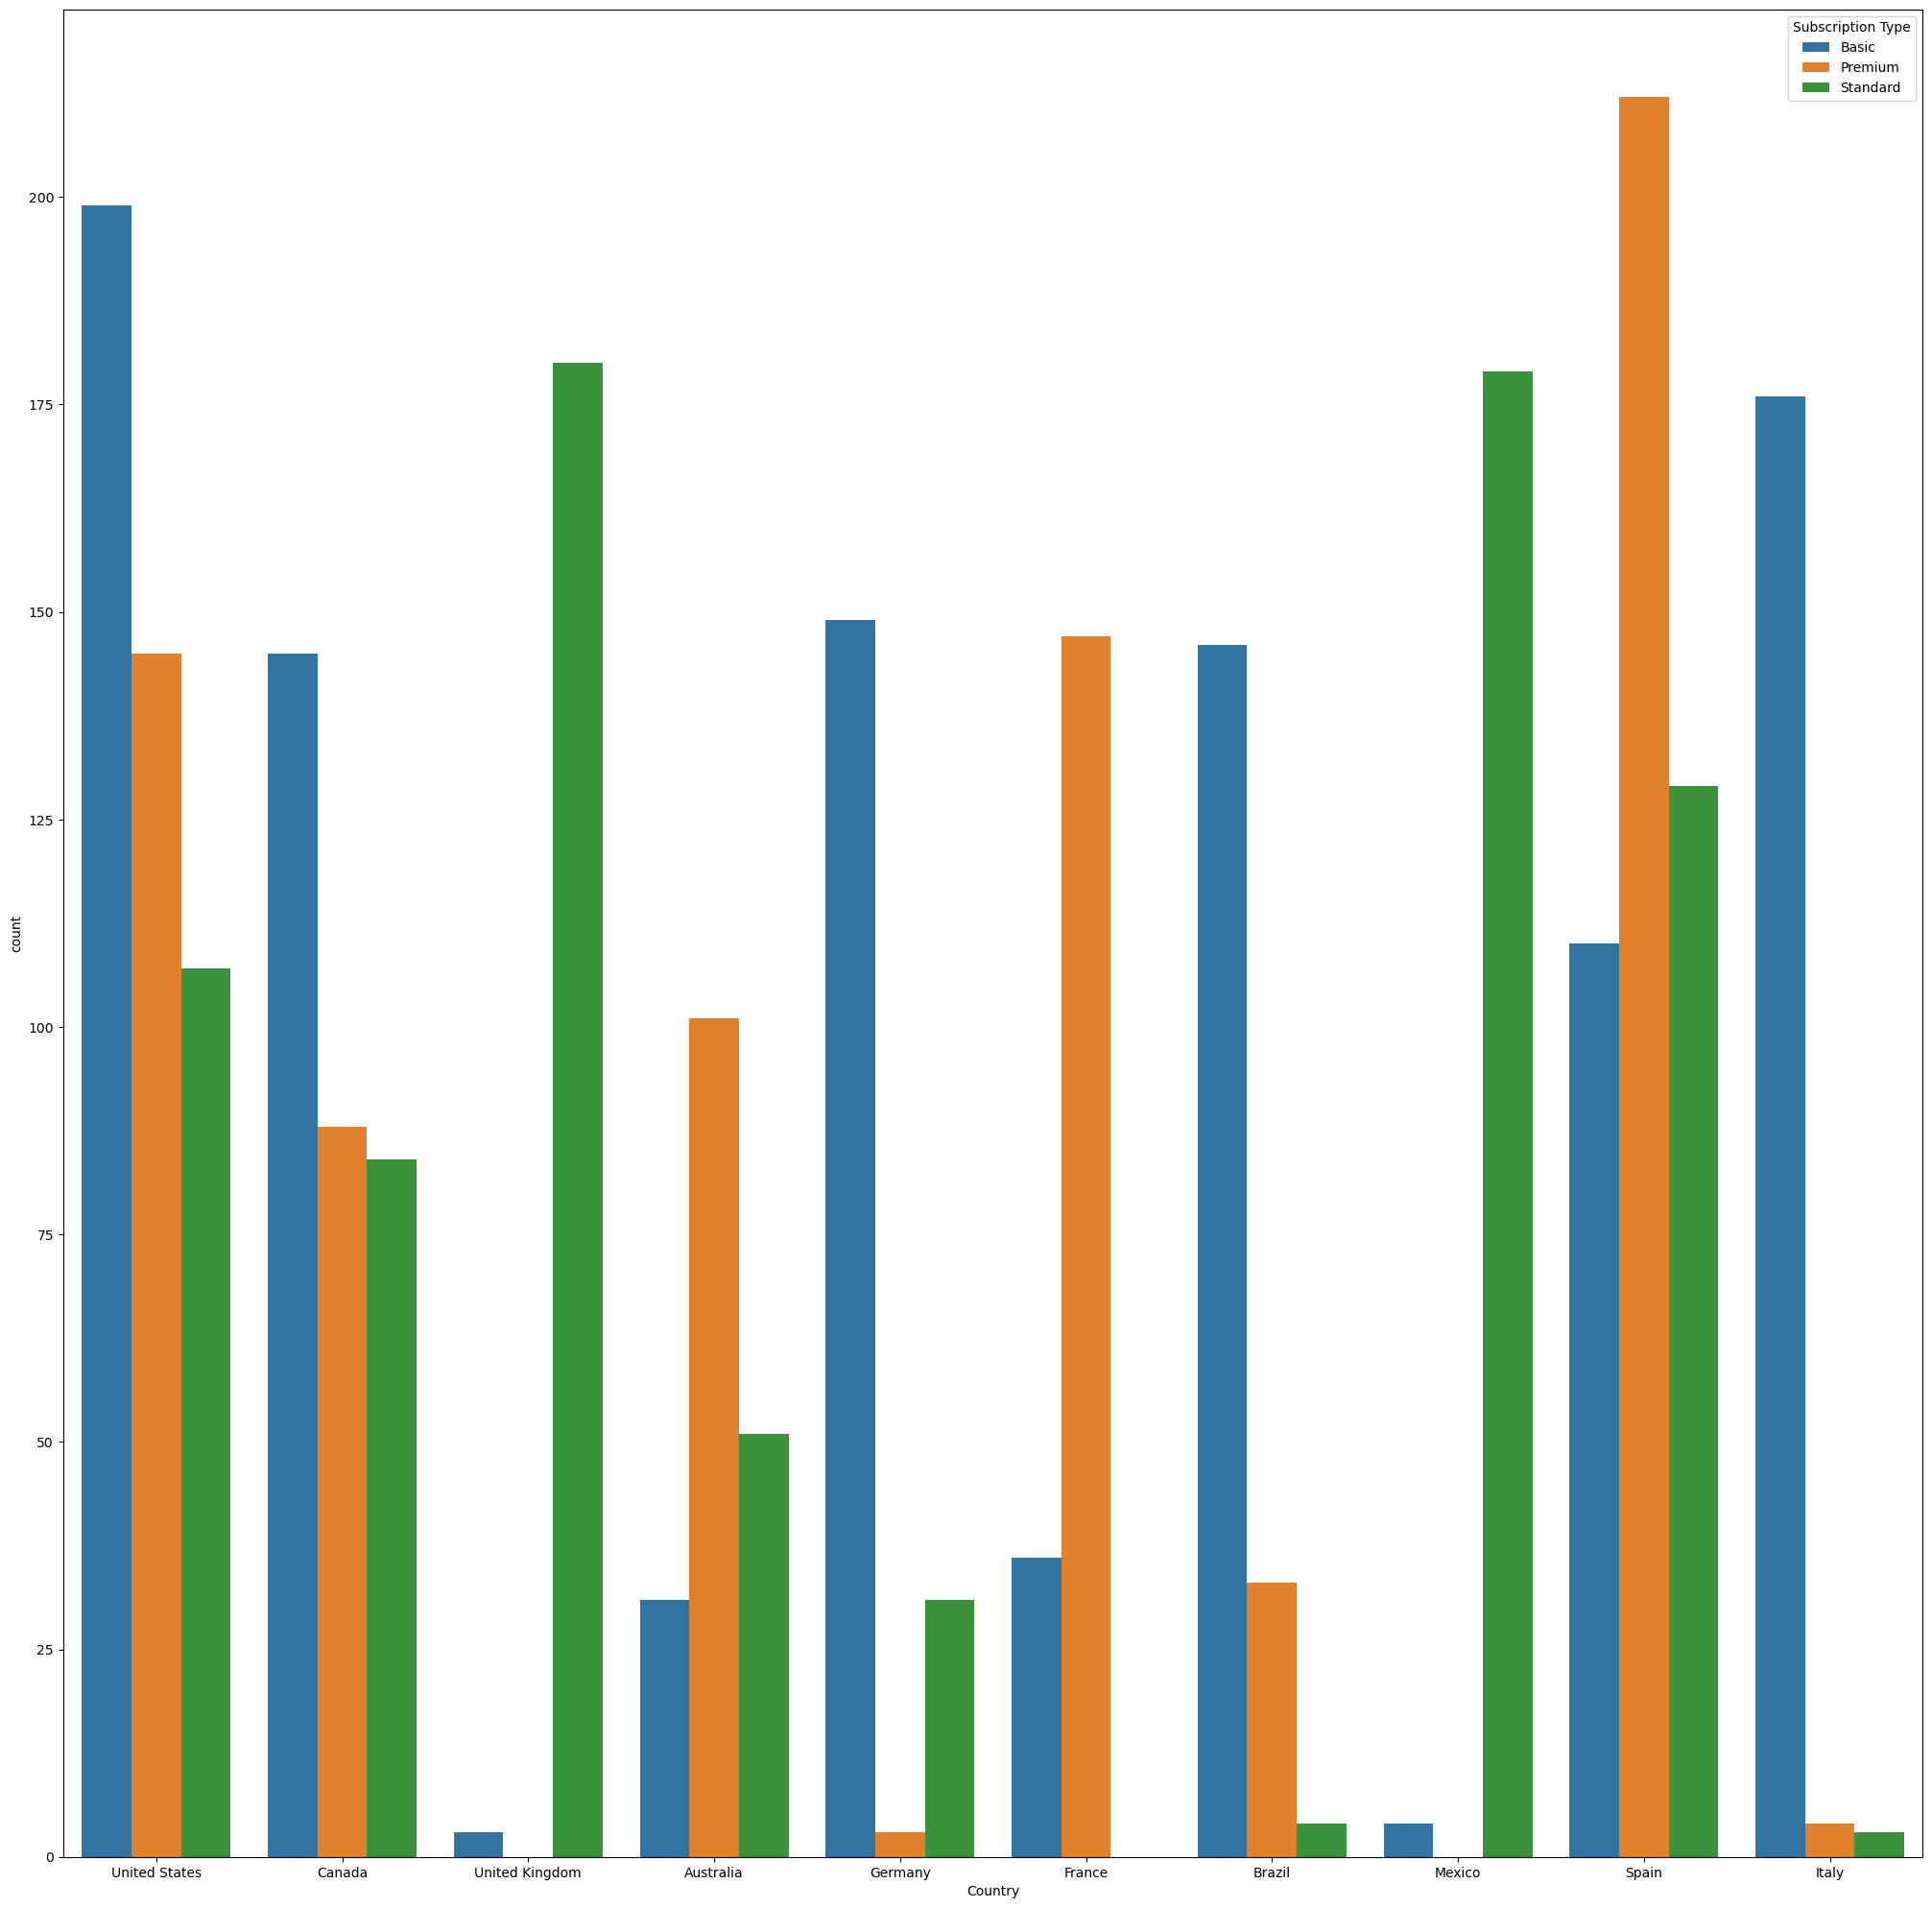

In [40]:
fig,ax = plt.subplots(figsize = (25,25))
sns.countplot(x = "Country" , data = Dataset , hue = "Subscription Type")
plt.title("Subscription type by country")

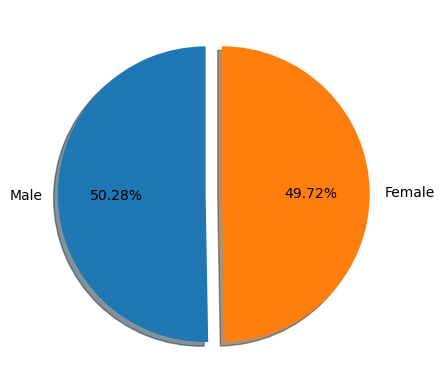

In [42]:
#Male-Female distribution
genders = Dataset.Gender.value_counts()
label = ["Male","Female"]
exp = (0.01,0.1)
plt.pie(genders,labels = label,explode = exp,shadow = True,startangle = 90,autopct = "%.2f%%")
plt.show()

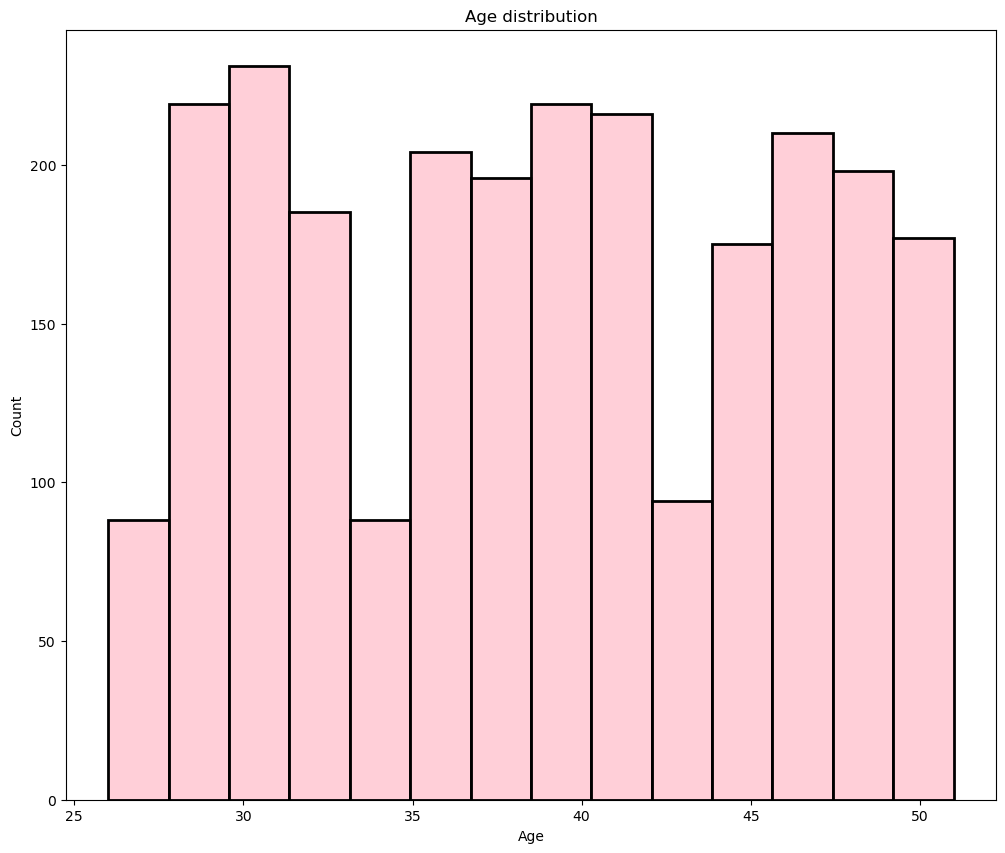

In [45]:
#age distribution
plt.figure(figsize = (12,10))
sns.histplot(data = Dataset,x = "Age",color = "pink",edgecolor = "black",lw = 2)
plt.title("Age distribution")
plt.show()

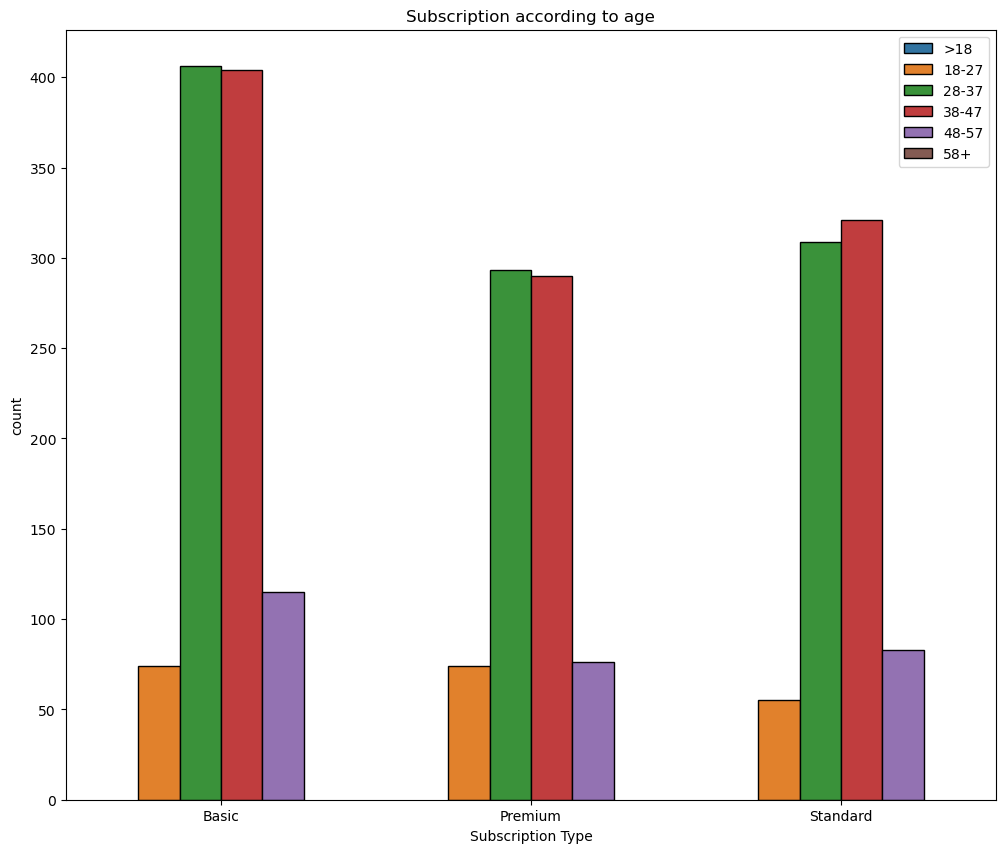

In [47]:
plt.figure(figsize = (12,10))
sns.countplot(data = Dataset,x = 'Subscription Type',hue = 'Age_bins',edgecolor = "black",lw = 1)
plt.title("Subscription according to age")
plt.legend(loc = "upper right")
plt.show()

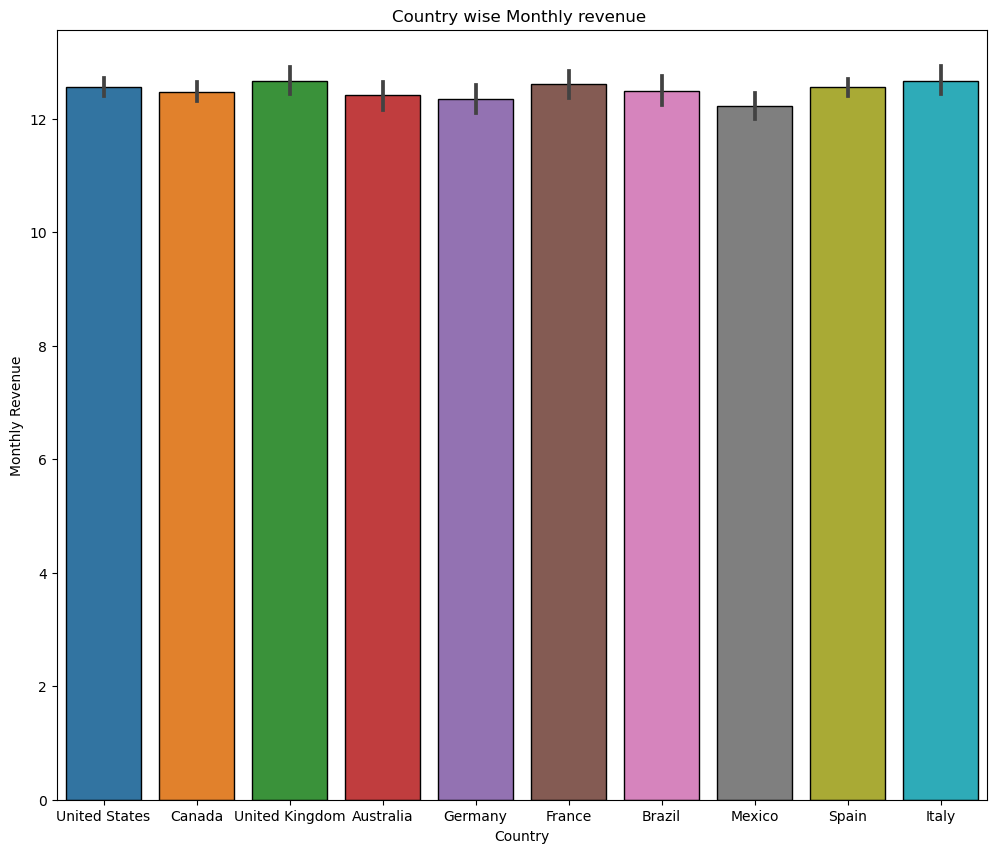

In [51]:
#Subscription revenue monthly by country
plt.subplots(figsize=(12,10))
sns.barplot(x = "Country",y = "Monthly Revenue",data = Dataset,edgecolor = "Black")
plt.title("Country wise Monthly revenue ")
plt.show()

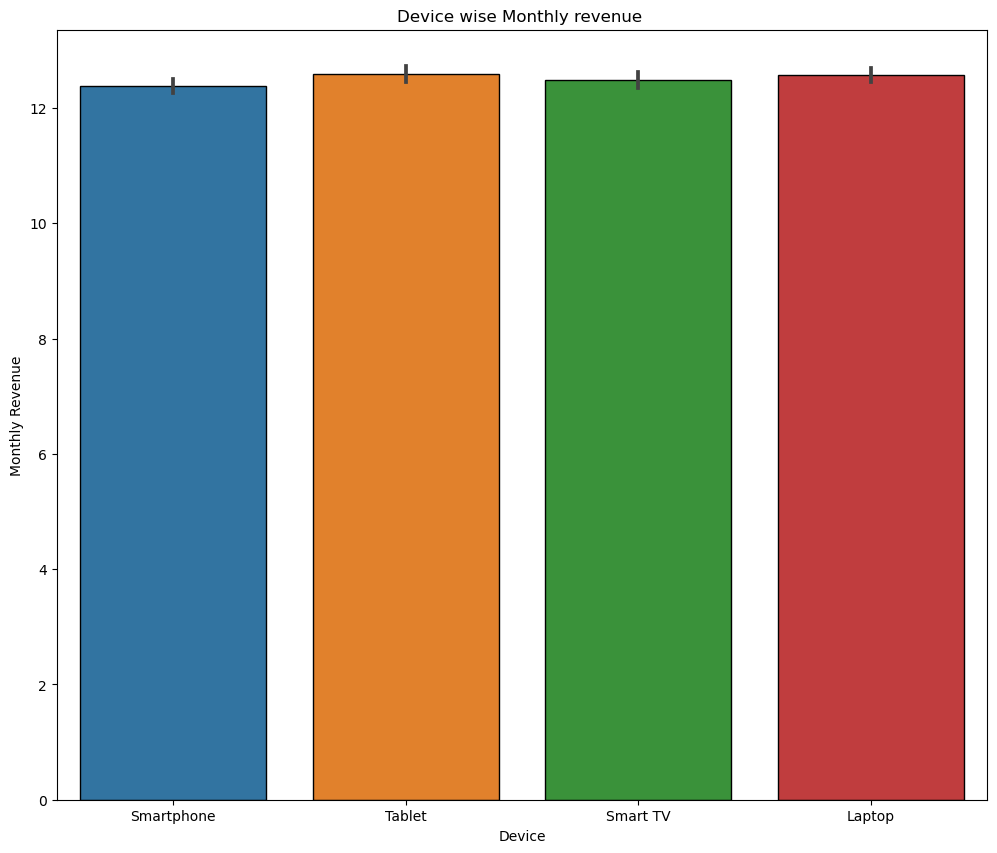

In [53]:
#device type montly revenue
plt.subplots(figsize=(12,10))
sns.barplot(x = "Device",y = "Monthly Revenue",data = Dataset,edgecolor = "Black")
plt.title("Device wise Monthly revenue ")
plt.show()

Text(0.5, 1.0, 'Use of device according to age range')

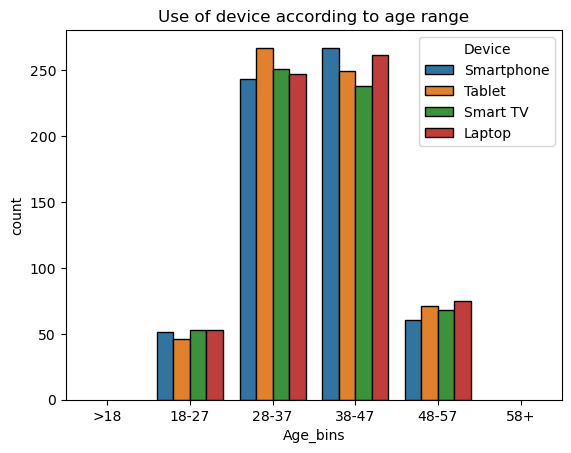

In [54]:
#use of device according to age
sns.countplot(x = "Age_bins", hue = "Device", data = Dataset, edgecolor = "Black")
plt.title("Use of device according to age range")

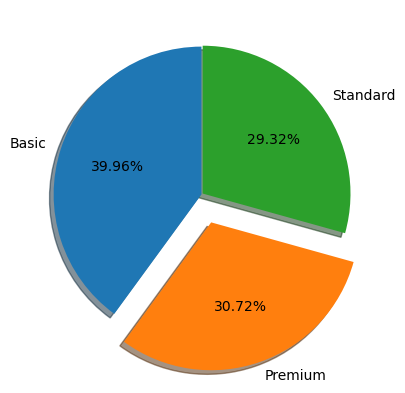

In [60]:
#% of subscription
label = ["Basic","Premium","Standard"]
x =Dataset["Subscription Type"].value_counts(ascending = False)
exp = [0,0.2,0.01]

plt.pie(x.values,labels = label,autopct = "%.2f%%",explode = exp,startangle = 90,shadow = True)
plt.show()

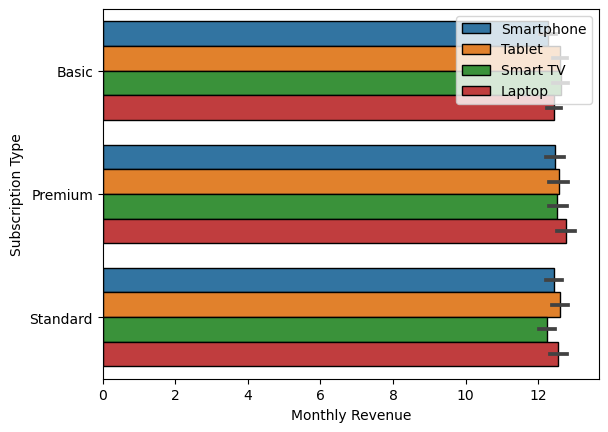

In [65]:
#subscription revenue every month'
sns.barplot(x = "Monthly Revenue",y = "Subscription Type",hue = "Device",data = Dataset,edgecolor = "Black",lw = 1)
plt.legend(loc = "upper right" )
plt.show()

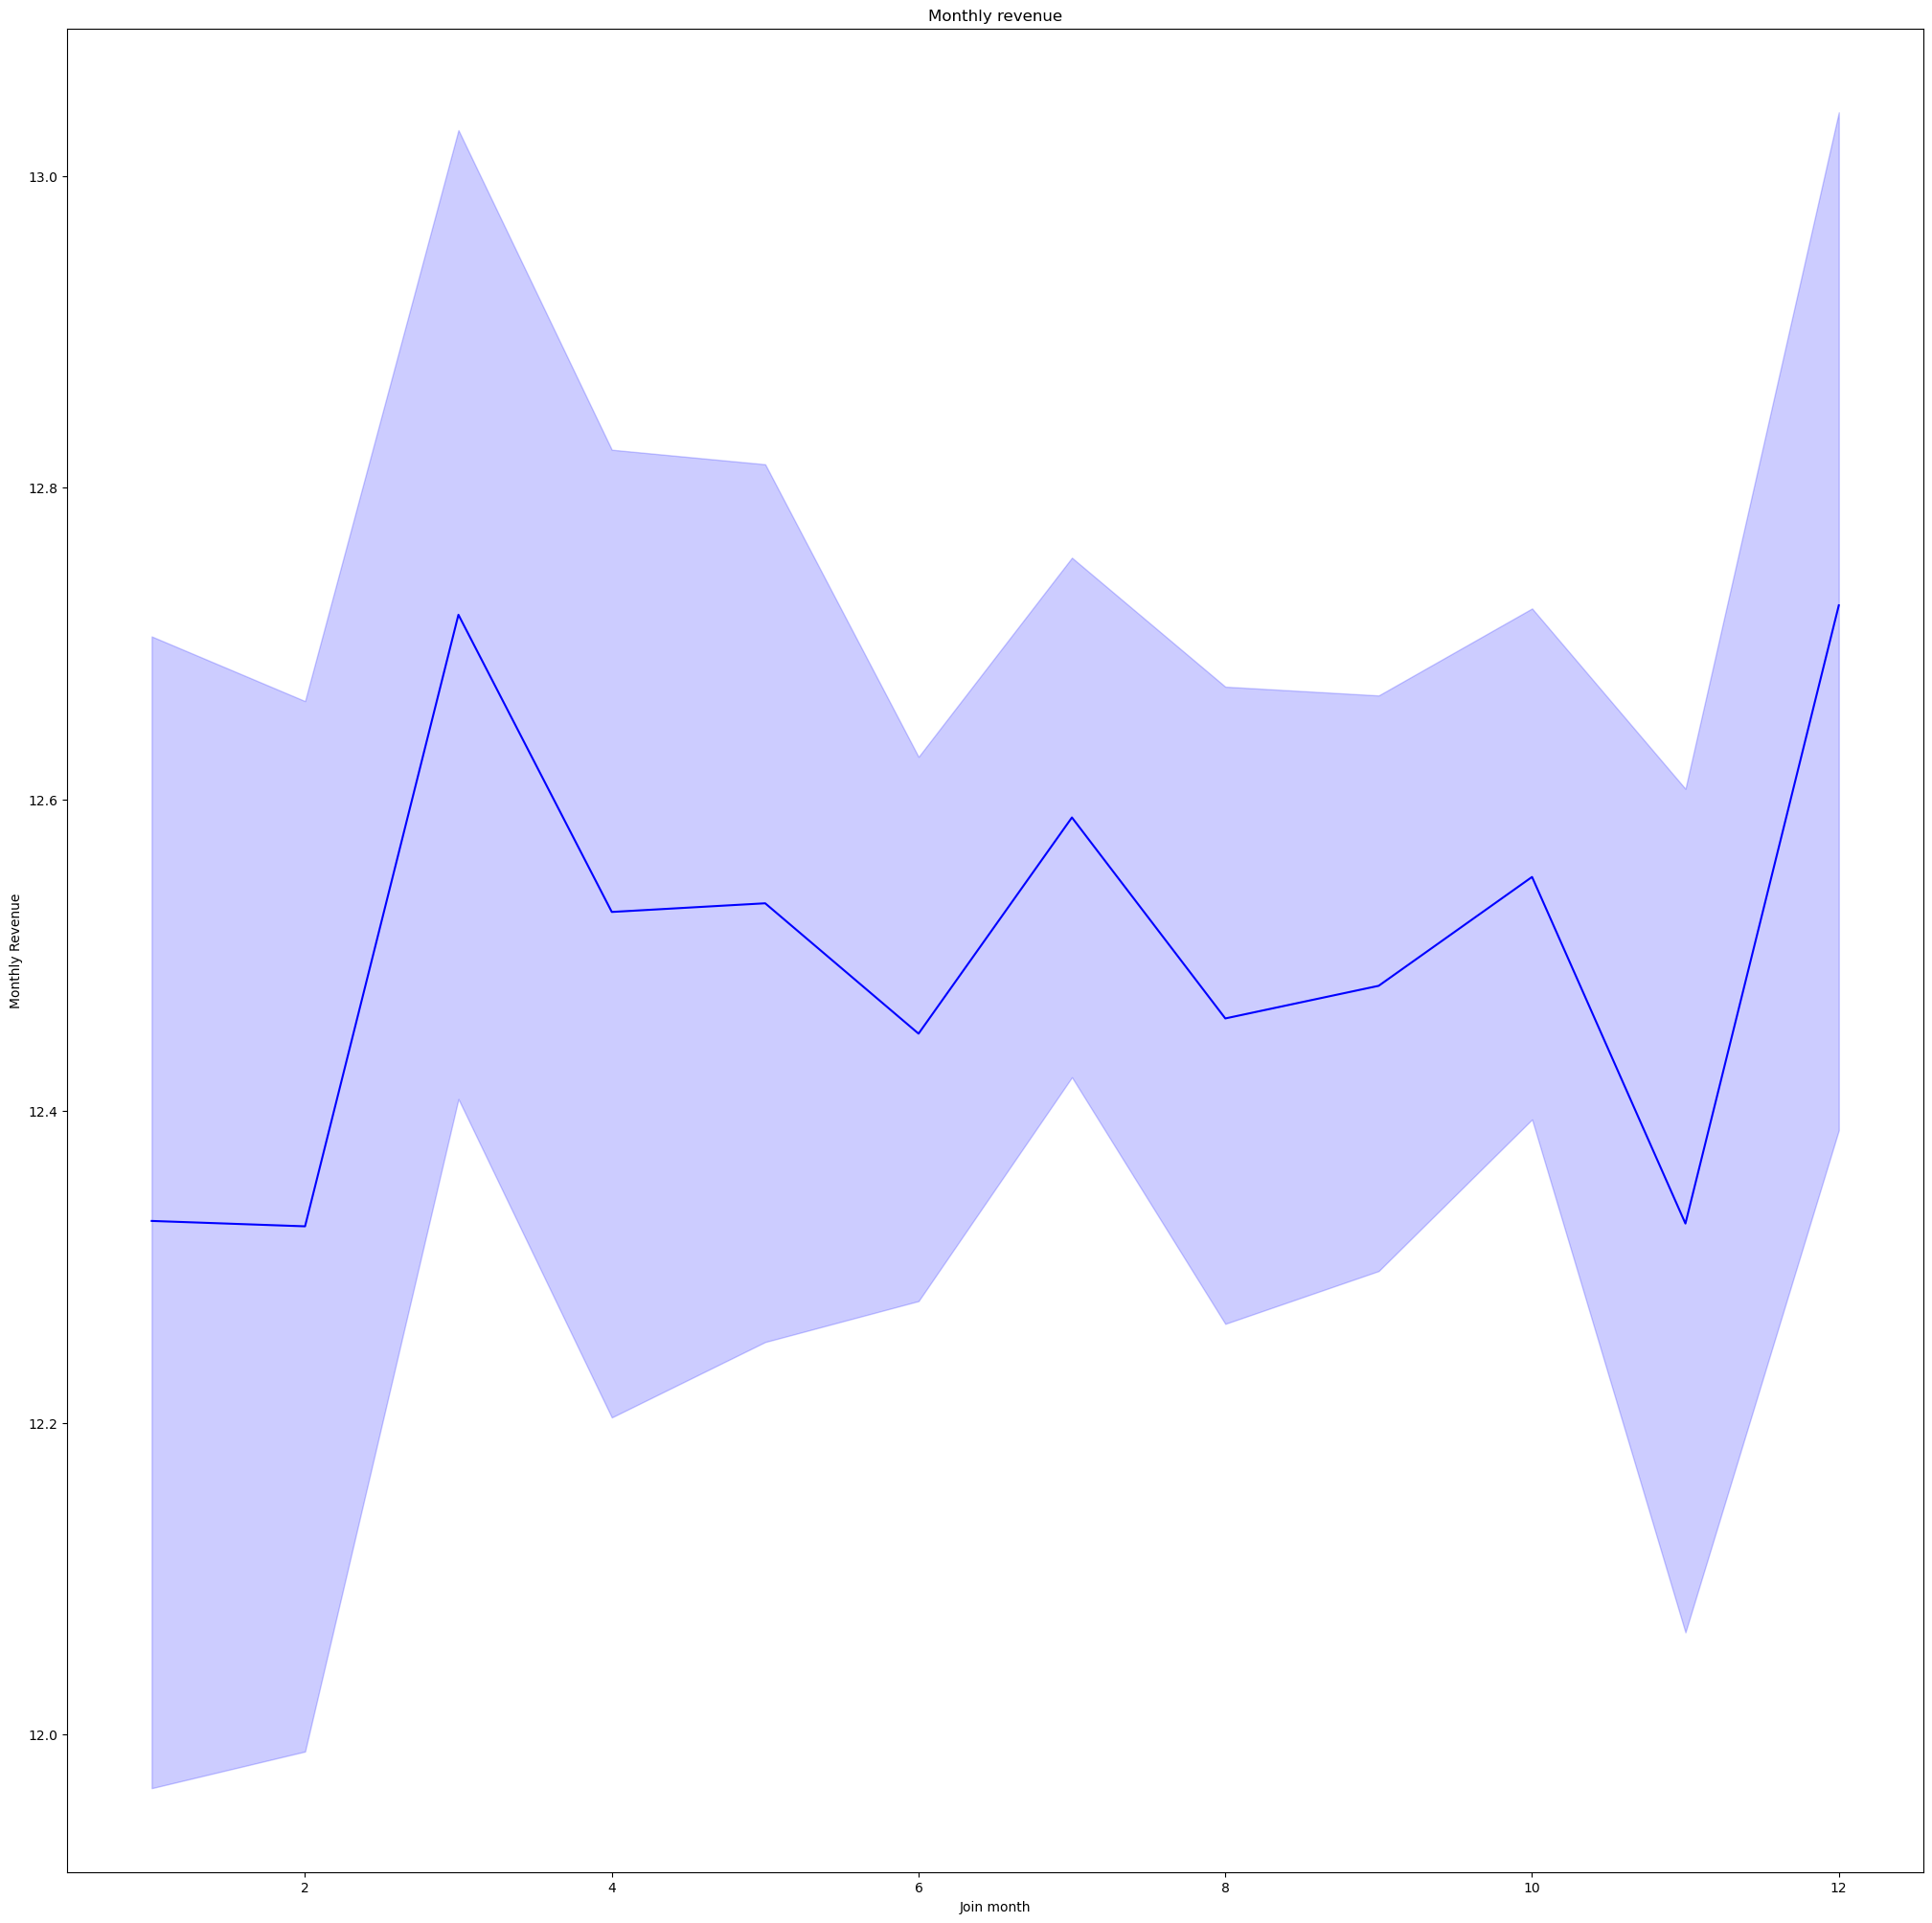

In [71]:
#monthly revenue
plt.subplots(figsize=(25,25))
sns.lineplot(x = "Join month",y = "Monthly Revenue",data = Dataset,estimator = "mean",color = "blue")
plt.title("Monthly revenue")
plt.show()

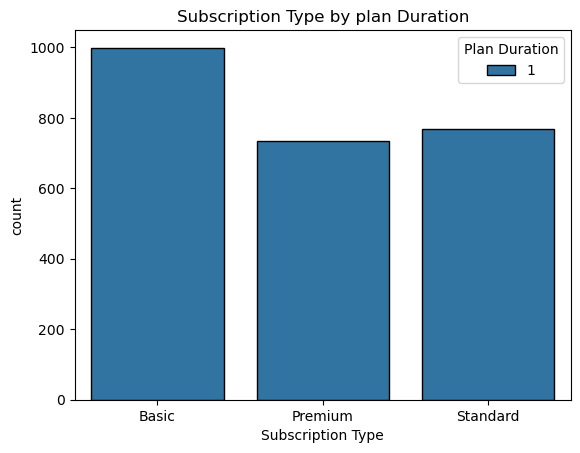

In [75]:
#Subscription type by plan duration
sns.countplot(data=Dataset,
x="Subscription Type",
hue="Plan Duration",edgecolor = "Black")
plt.title("Subscription Type by plan Duration")
plt.show()

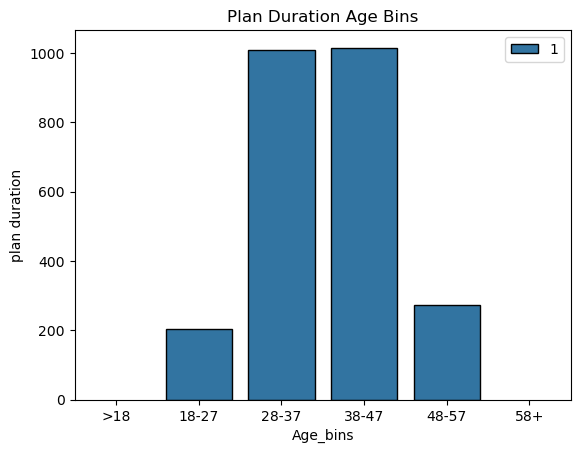

In [78]:
#plan duration by ages
sns.countplot(data=Dataset,
x="Age_bins",
hue="Plan Duration",
edgecolor="Black")
plt.legend(loc="upper right")
plt.title("Plan Duration Age Bins")
plt.ylabel("plan duration")
plt.show()

In [81]:
Dataset.to_csv("Netflix user Database cleaned.csv")

array([0.44444444, 0.125     , 0.5       , 1.        , 0.11111111])

31.753739937210547
135.6
